In [2]:
pip install neurokit2

Note: you may need to restart the kernel to use updated packages.


In [63]:
import neurokit2 as nk # open source package for biosignal processing
import matplotlib.pyplot as plt # plotting
import numpy as np
from scipy.signal import find_peaks # peak detection

# Synthetische Daten

**Q1:**
Beschreiben sie die Unterschiede bei den folgenden zwei Figuren (jeweils RR-Distributon, PSD for frequency Domains und Poincaré Plots): Welches der beiden EKGs ist künstlich aufgestellt werden und was deutet darauf hin (außer der Funktion 'simulate'):

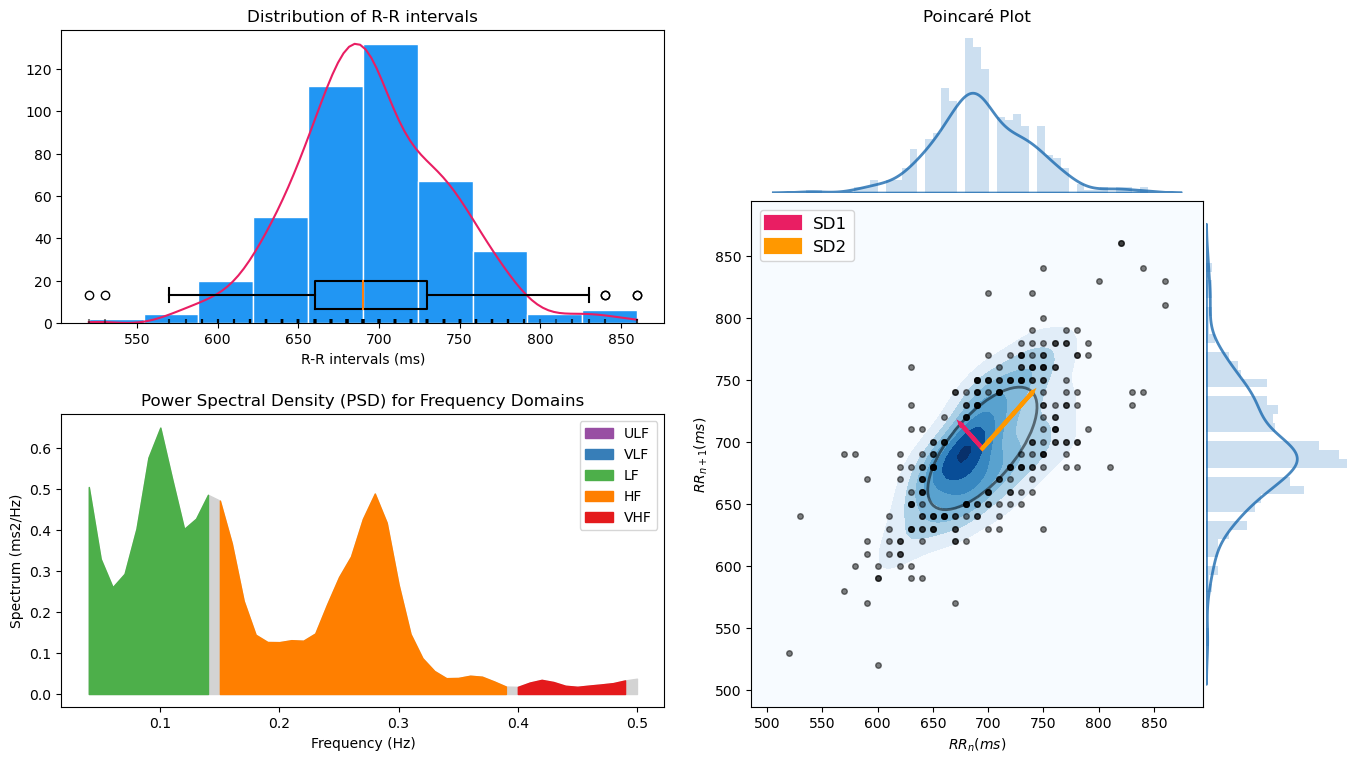

In [24]:
# Download data
data = nk.data("bio_resting_5min_100hz")

# Clean signal and Find peaks
ecg_cleaned = nk.ecg_clean(data["ECG"], sampling_rate=100)
peaks, info = nk.ecg_peaks(ecg_cleaned, sampling_rate=100, correct_artifacts=True)

# Compute HRV indices
plt.rcParams['figure.figsize'] = [14, 8]
plt.rc('font', size=10)
hrv_indices = nk.hrv(peaks, sampling_rate=100, show=True)
plt.tight_layout(pad=2.0)

/opt/conda/lib/python3.10/site-packages/neurokit2/hrv/hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


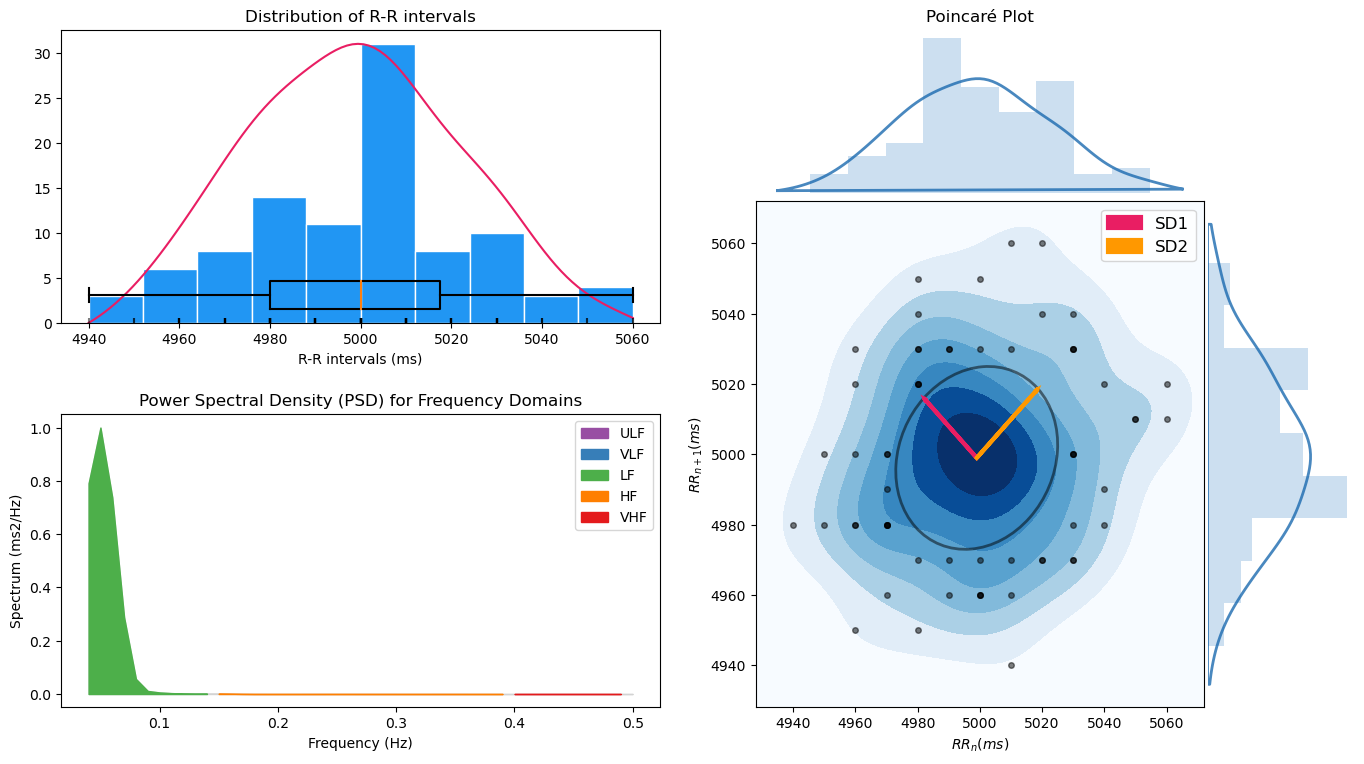

In [32]:
#load other data
ekg = nk.ecg_simulate(duration=100, sampling_rate=500, heart_rate=60, heart_rate_std=0.3, noise= 0.01, random_state=42)

# Clean signal and Find peaks
ecg_cleaned = nk.ecg_clean(ekg, sampling_rate=500)
peaks, info = nk.ecg_peaks(ecg_cleaned, sampling_rate=500, correct_artifacts=True)

# Compute HRV indices
plt.rcParams['figure.figsize'] = [14, 8]
plt.rc('font', size=10)
hrv_indices = nk.hrv(peaks, sampling_rate=100, show=True)
plt.tight_layout(pad=2.0)

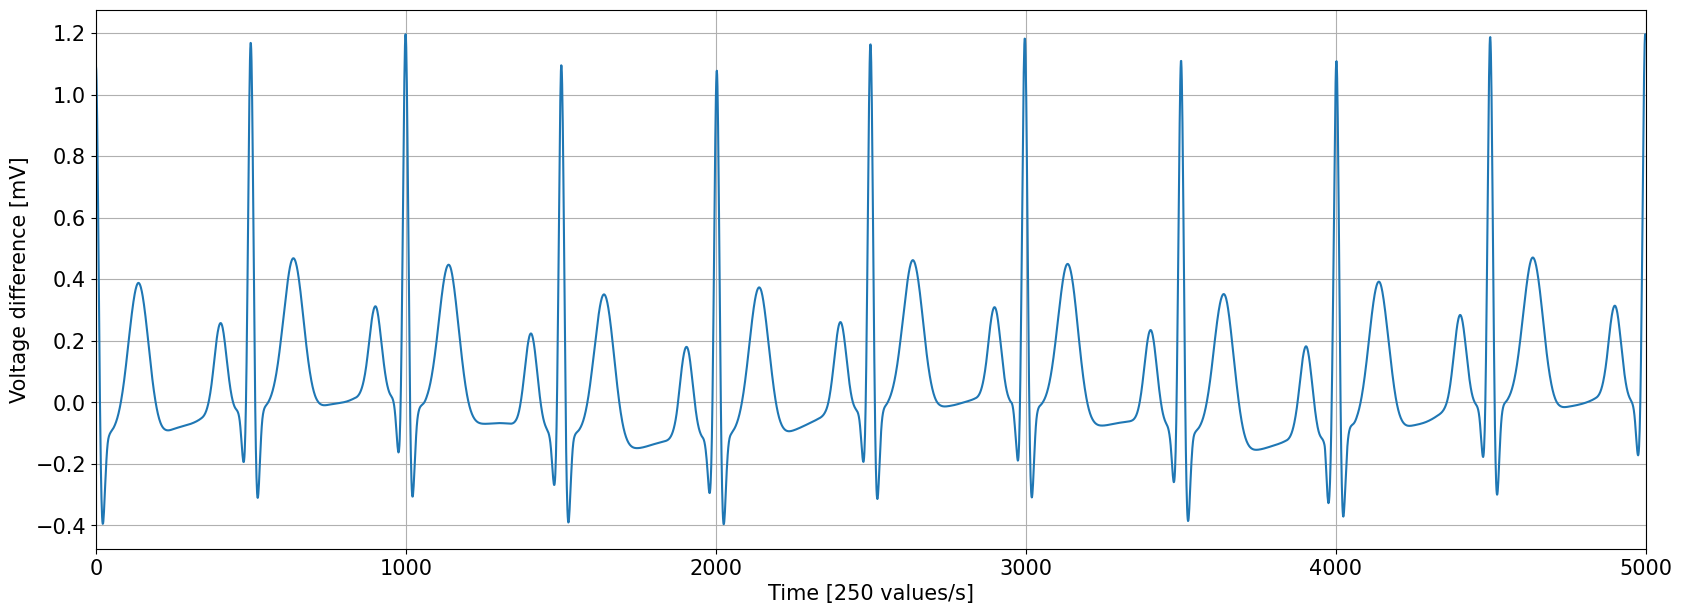

In [40]:
ekg = nk.ecg_simulate(duration=10, sampling_rate=500, heart_rate=60, heart_rate_std=0.3, noise= 0.01, random_state=42)

plt.rcParams['figure.figsize'] = [20, 7]
plt.rc('font', size=15)
plt.plot(ekg)
plt.xlim(0, len(ekg))
plt.grid(visible=True)
plt.xlabel('Time [250 values/s]')
plt.ylabel('Voltage difference [mV]')
plt.show()

# Algorithmische Patientenüberwachung mittels Herzrate 

Das automatische Verarbeiten von Biosignalen bildet die Grundlage dafür, dass Computeralgorithmen dazu genutzt werden können akute Krankheitszustände in Patienten zu erkennen. Dafür müssen einfache Regeln definiert werden, die ein Algorithmus benutzen kann, um Merkmale aus dem Signal zu extrahieren. Außerdem wird ein Schwellwert definiert, bei dem der Algorithmus Alarm schlagen soll. 
Im Elektrokardiogram (EKG) kann dies dazu genutzt werden die Postition des Herzschlag im Signal zu bestimmen (R-Zacke, Punkt der maximalen Depolarisation). Dadurch kann bei zu langsamen oder zu hohen Frequenzen ein Alarm ausgelöst werden, da in beiden Fällen ggf. zu wenig Blut durch den Körper gepumpt wird.

**Q2:**
Benutzen Sie die Funktion find_peaks (Dokumentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html) um  manuell die Höhe (height) der R-Peaks für das Signal 'ekg' zu definieren. Ab welchem Schwellwert klappt die Peak-Detektion nicht mehr? 
Visualisieren Sie die gefundenen Peaks in dem Signal mit der Funktion plt.vlines().

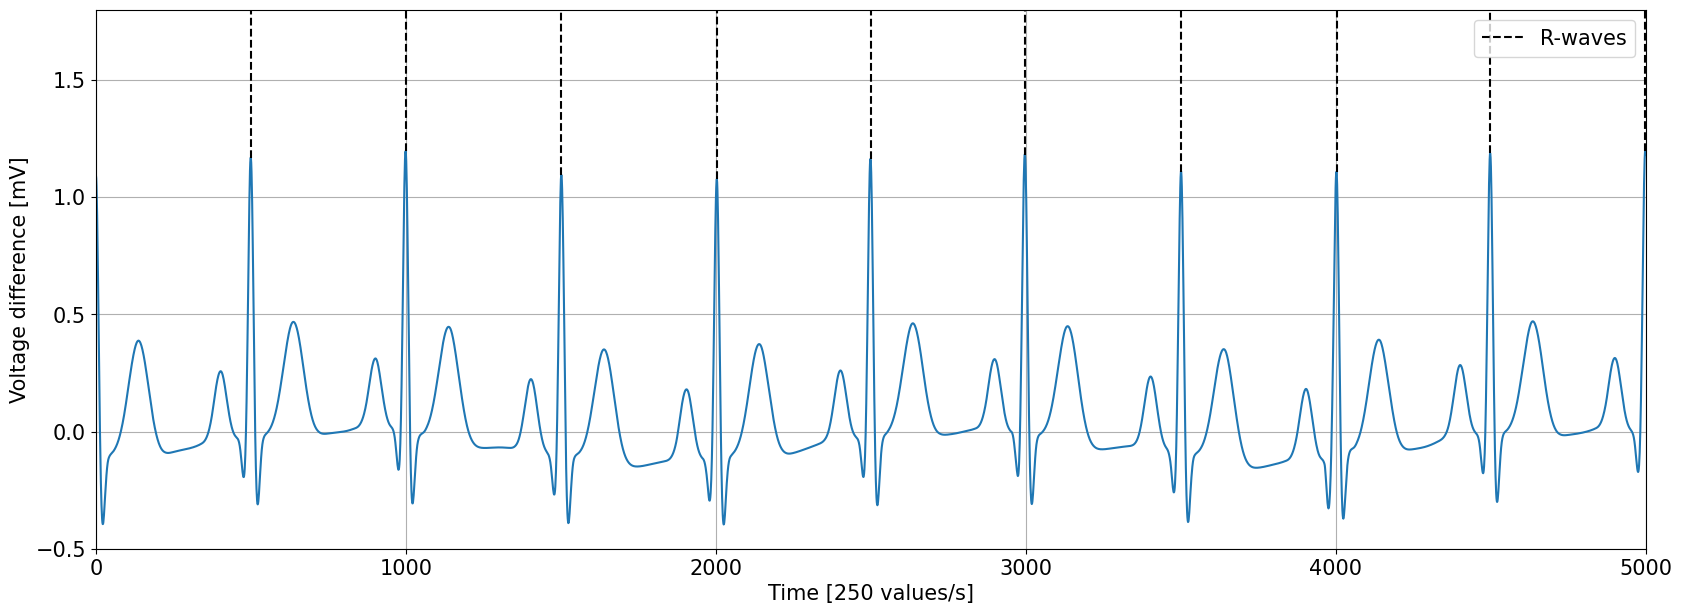

In [89]:
ekg = nk.ecg_simulate(duration=10, sampling_rate=500, heart_rate=60, heart_rate_std=0.3, noise= 0.01, random_state=42)

###Musterlösung
peaks = find_peaks(ekg, height= 0.5)

plt.plot(ekg)
plt.vlines(peaks[0], ekg[peaks[0]], 1.8, linestyles='dashed', label='R-waves', color='black')
plt.xlim(0, len(ekg))
plt.ylim(-0.5,1.8)
plt.grid(visible=True)
plt.xlabel('Time [250 values/s]')
plt.ylabel('Voltage difference [mV]')
plt.legend(loc='best')
plt.show()

# Artefakte

Physiologische Störsignale wie Atmung, Muskelzittern oder Bewegungsartefakte können zu einem Baseline-Wandering führen, dass die Peak Detektion deutlich erschwert. Aber gerade Patienten, die nicht still liegen können (Bspw. wegen eines Krampfanfall oder stark traumatischen Verletzungen), könnten von einer Algorithmus-gestützen Überwachung profitieren. 

**Q3:**
Wie kann der Algorithmus verbessert werden, um auch bei einem schlechtem Signal den Herzschlag (R-Peak) sicher zu detektieren? (Tipp: Die Dokumentation von find_peaks enthält diverse Lösungen für das Problem)

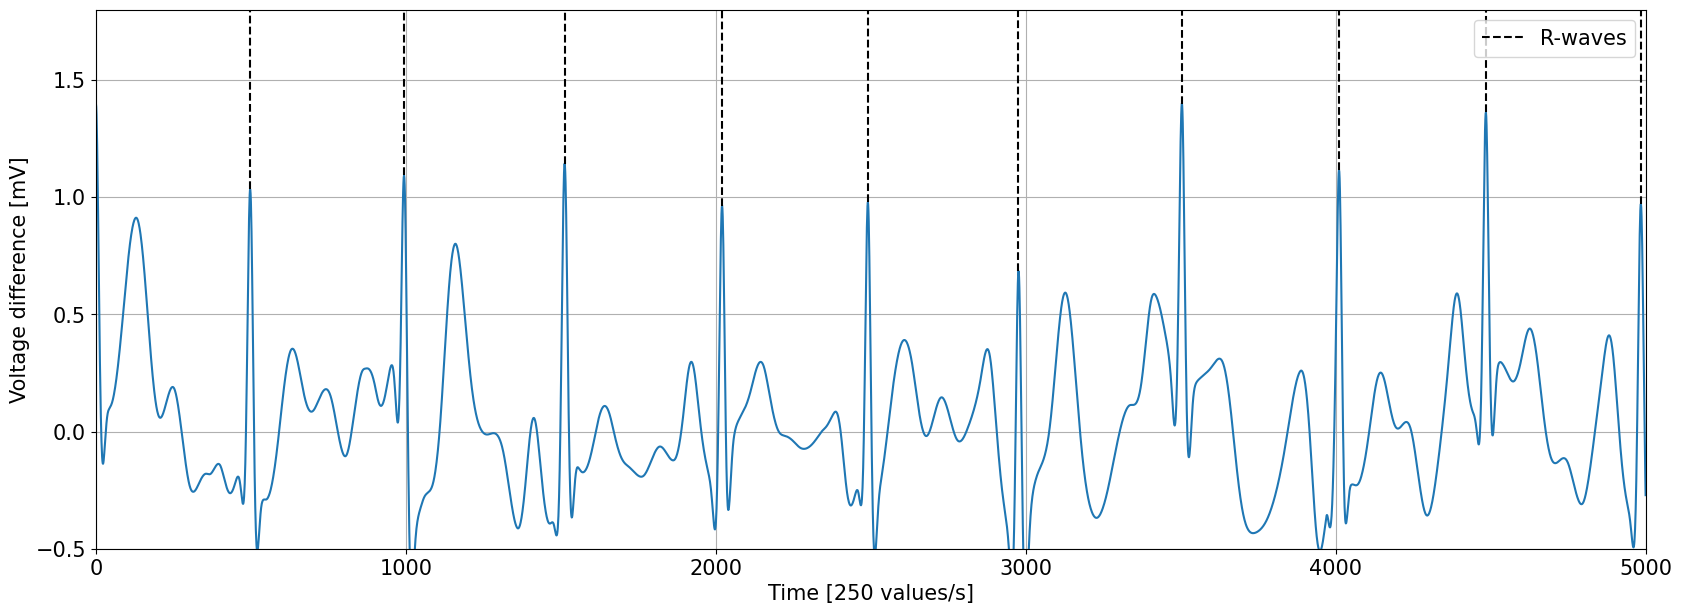

In [77]:
ekg = nk.ecg_simulate(duration=10, sampling_rate=500, heart_rate=60, heart_rate_std=2, noise= 0.5, random_state=42)

###Musterlösung
peaks = find_peaks(ekg, height= 0.5, distance=450)

plt.plot(ekg)
plt.vlines(peaks[0], ekg[peaks[0]], 1.8, linestyles='dashed', label='R-waves', color='black')
plt.xlim(0, len(ekg))
plt.ylim(-0.5,1.8)
plt.legend(loc='best')
plt.grid(visible=True)
plt.xlabel('Time [250 values/s]')
plt.ylabel('Voltage difference [mV]')
plt.show()

# Von Peaks zur Frequenz
**Q4:**
Das Signal ist 10 Sekunden lang. Berechnen Sie anäherungsweise die Herzfrequenz für die ermittelten Peaks. Wieviel Peaks wären nötig, wenn das Gerät bei bradykarden (Herzschlag zu langsam) oder tachykarden (Herzschlag zu schnell) Alarm geben soll? Bradykardie soll bei weniger als 55 und Tachykardie bei mehr als 150 Schlägen pro Minute erkannt werden.

In [78]:
### Musterlösung
print('Die berechneten Peaks resultieren in einer Frequenz von',len(peaks[0])*6, 'Herzschlägen pro Minute.')
# Bradykardie
print('Weniger als', round(55/6,1), 'detektierte Peaks würden einen Bradykardie-Alarm auslösen.')
# Tachykardie
print('Mehr als', round(150/6,1), 'detektierte Peaks würden einen Tachykardie-Alarm auslösen.')

Die berechneten Peaks resultieren in einer Frequenz von 60 Herzschlägen pro Minute.
Weniger als 9.2 detektierte Peaks würden einen Bradykardie-Alarm auslösen.
Mehr als 25.0 detektierte Peaks würden einen Tachykardie-Alarm auslösen.


**Q5:**
Viele alte 'bewährte';) EKG Algorithmen nutzen nach wie vor nur 3 detektierte Peaks, um die Herzfrequenz zu ermitteln. Was könnten hier zusätzlich für Probleme bei arrhythmischen Patienten entstehen? 

###Musterlösung: Herzfrequenz schwankt erheblich und löst Fehlalarme aus

**Q6:**
Angenommen, dass nachfolgende Signal stammt von demselben Patienten und enthält die mit einem Laser ermittelte Durchblutung der Kapilaren an einem Finger oder am Ohrläppchen. Können die beiden Signale synchronisiert werden, um den Alarm Algorithmus robuster zu machen? Was ist ein Vorteil, wenn mehrerer Biosignale zusammen interpretiert werden?

###Musterlösung: Das EKG liefert die Information über die elektrische Erregung und das PPG über den tatsächlichen Auswurf und damit über den Blutfluß im Körper. Zusammengenommen liefern die beiden Biosignale ein viel komplexeres und robusteres Bild über den kardiovaskulären Zustand des Patienten. 

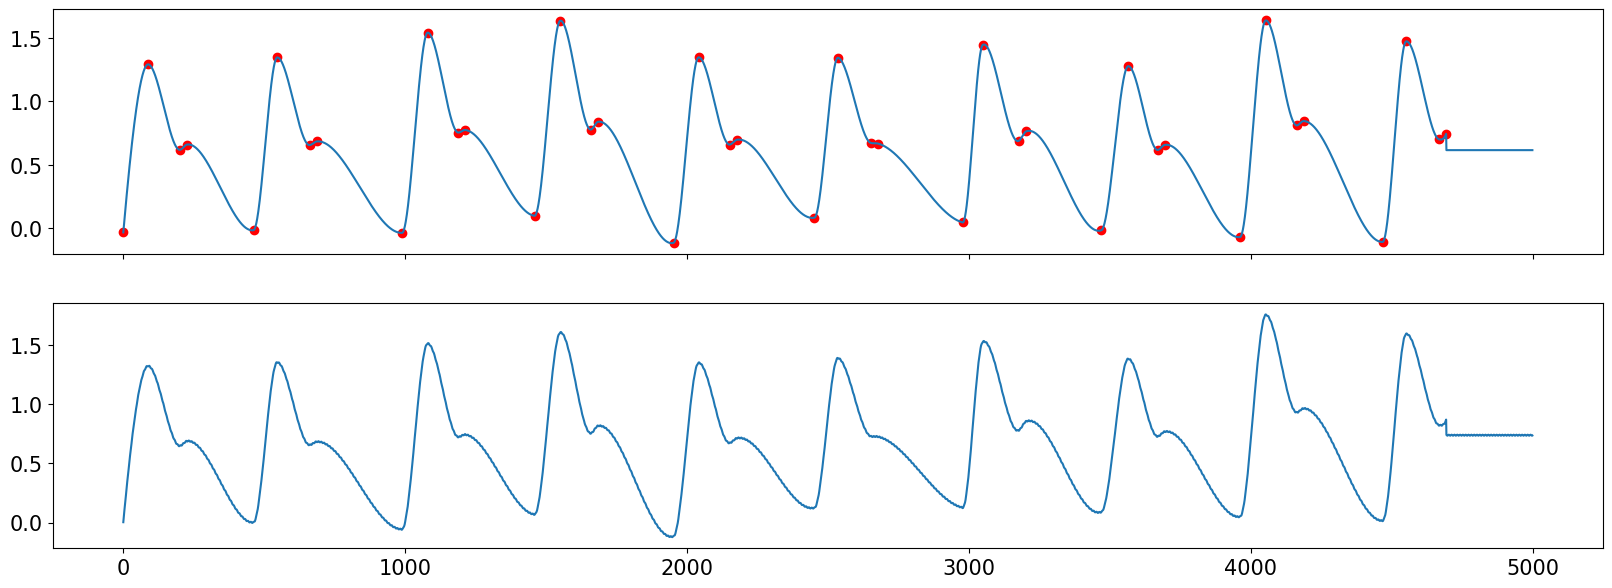

In [75]:
ppg = nk.ppg_simulate(duration=10, sampling_rate=500, heart_rate=60, frequency_modulation=0.0, ibi_randomness=0.1, drift=0, motion_amplitude=0.1, powerline_amplitude=0.01, burst_number=0, burst_amplitude=1, random_state=13, show=True)

IndexError: index 5440 is out of bounds for axis 0 with size 5000

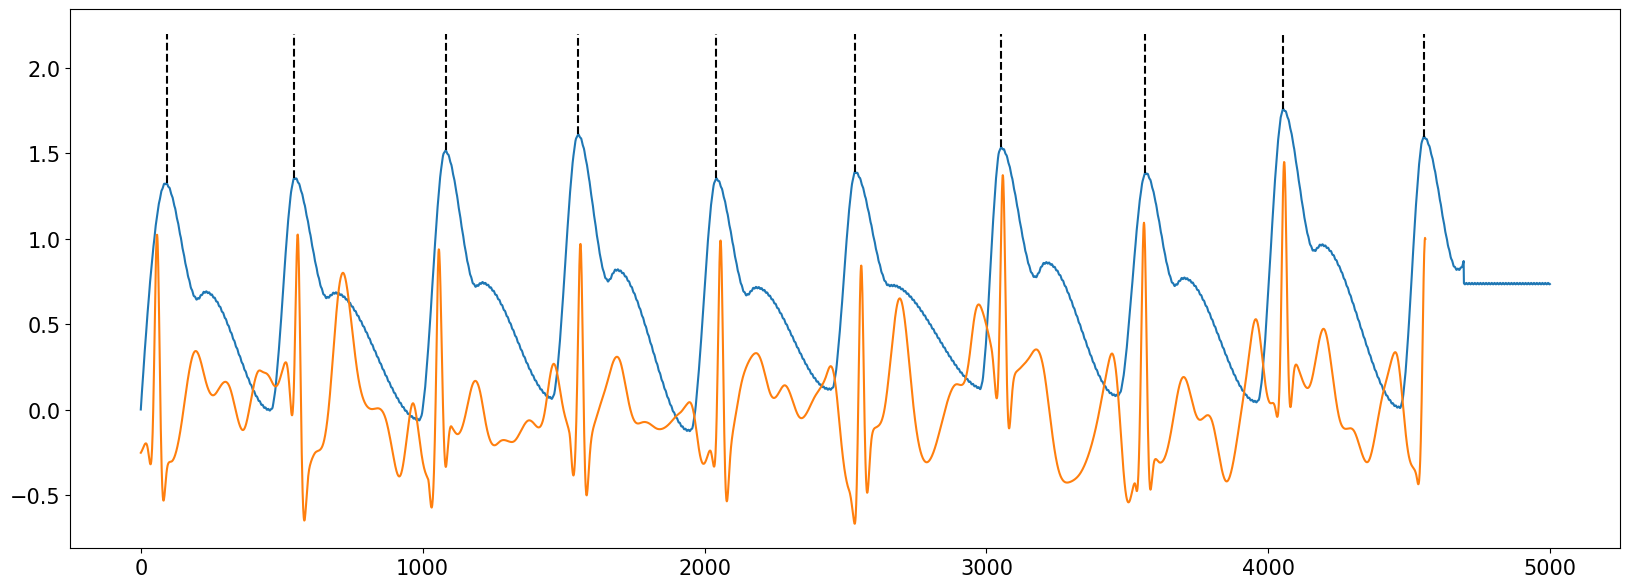

In [87]:
ekg = nk.ecg_simulate(duration=10, sampling_rate=500, heart_rate=60, heart_rate_std=0.2, noise= 0.5, random_state=42)

### Musterlösung
peaks_ppg = find_peaks(ppg, height=1.2, distance=250)
peaks_ekg = find_peaks(ekg, height= 0.5, distance=450)
Abweichung = int(abs(np.mean(peaks_ppg[0]-peaks_ekg[0])))

plt.plot(ppg)
plt.plot(ekg[Abweichung:])
plt.vlines(peaks_ppg[0], ppg[peaks_ppg[0]], 2.2, linestyles='dashed', label='PPG', color='black')
plt.xlim(0, len(ppg))
plt.ylim(-0.5,2.2)
plt.legend(loc='best')
plt.show()